#### Importing the required libraries

In [1]:
import numpy as np 
import jax 
import jax.numpy as jnp 
import jax.random as jar 
import matplotlib.pyplot as plt

from tqdm import tqdm 

jax.config.update("jax_enable_x64", True)
from importlib import reload 

from  src.jaxPSI import * 
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

#### Model A example

To define a model we have to pass two d-tuple containing the  dimensions $L_i$ and the number of bins $N_i$



In [2]:
Li = (256, 256)
Ni = (256, 256) 
model = ModelA(Li, Ni) 
par = {'r' : -0.5, 'J' : 1.0, 'Gamma' : 1.0, 'Gamma_t' : 0.1, 'dt' : 0.1} 

Simulation 

In [3]:
model = ModelA(Li, Ni)
rng = jar.PRNGKey(0)
rng_sim, rng_init = jar.split(rng, 2) 
field= model.Init(rng_init)
field_end, obs = model.simulate(field, par, rng_sim, 1000, SaveStep = 4, ShowProgress=True)

100%|██████████| 10001/10001 [00:18<00:00, 534.13it/s]


Plot some configurations and exporting a gift of the simulation 

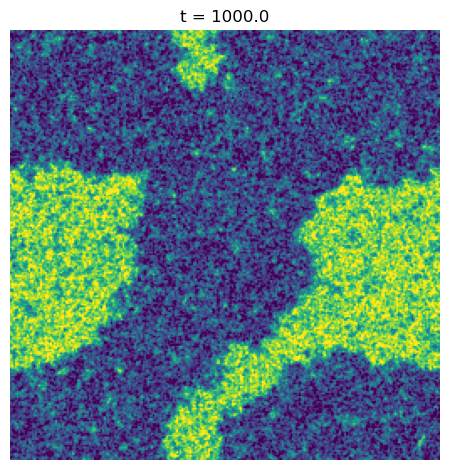

In [4]:
n = -1
fig, ax = plt.subplots(1,1)
y = jnp.real(obs['phi'][n])
im2 = ax.imshow(y, vmin =-1, vmax=1)
ax.set_title(f"t = {obs['t'][n]}")
# fig.colorbar(im2)
ax.axis('off')  
plt.tight_layout() 
plt.show() 

In [5]:


# Save each frame as an image
frames = []
cmap = 'viridis'
for t, snapshot in  tqdm(zip(obs['t'], obs['phi'])):
    fig, ax = plt.subplots(1,1)
    im = ax.imshow(snapshot, cmap=cmap, animated=True, vmin = -1, vmax = 1)
    ax.axis('off') 
    ax.set_title(f"t = {t:.2f}")
    
    # Save frame to a buffer
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.buffer_rgba(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))

    frames.append(Image.fromarray(image))

    plt.close(fig)  

# Save all frames as a GIF
frames[0].save(
    "gifs/ModelA_example.gif",
    save_all=True,
    append_images=frames[1:],
    duration=100,  
    loop=0,  
)

251it [00:04, 56.47it/s]


####  Model B example 

In [6]:
L = 256
N = 256
Li = (L, L) 
Ni = (N, N) 
model = ModelB(Li, Ni)
par = {'r' : -0.5, 'J' : 1.0, 'Gamma' : 1.0, 'Gamma_t' : 0.01, 'dt' : 0.1} 

In [7]:
rng = jar.PRNGKey(0)  
rng_init, rng_sim = jar.split(rng)
field = model.InitAt(rng_init, 0.0 )   
field_end, obs = model.simulate(field, par, rng_sim, 1000, SaveStep = 4, ShowProgress=True)

100%|██████████| 10001/10001 [00:17<00:00, 559.86it/s]


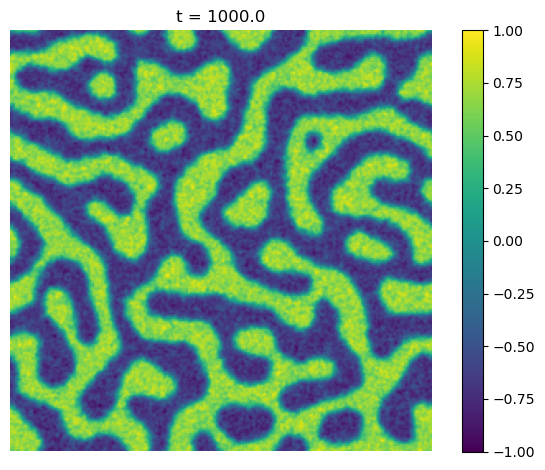

In [8]:
n = -1
fig, ax = plt.subplots(1,1)
y = jnp.real(obs['phi'][n])
im2 = ax.imshow(y, vmin =-1, vmax=1)
ax.set_title(f"t = {obs['t'][n]}")
fig.colorbar(im2)
ax.axis('off')  
plt.tight_layout() 
plt.show() 

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Save each frame as an image
frames = []
cmap = 'viridis'
for t, snapshot in  tqdm(zip(obs['t'], obs['phi'])):
    fig, ax = plt.subplots(1,1)
    im = ax.imshow(snapshot, cmap=cmap, animated=True, vmin = -1, vmax = 1)
    ax.axis('off')  
    ax.set_title(f"t = {t:.2f}")
    plt.tight_layout()
    # Save frame to a buffer
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.buffer_rgba(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    frames.append(Image.fromarray(image))

    plt.close(fig)  

# Save all frames as a GIF
frames[0].save(
    "gifs/ModelB_example.gif",
    save_all=True,
    append_images=frames[1:],
    duration=100,  
    loop=0, 
)

251it [00:04, 55.05it/s]


####  Active Ising model  

In [10]:
L = 1
N = 400
Li = (400, 100) 
Ni = (400, 100) 
model = AIM(Li, Ni)


par = {'r' : -0.8, 'J' : 1.0, 'Gamma' : 2.0, 'Gamma_t' : 0.1, 'dt' : 0.1, 
       'D' : 1.0, 'D_t' : 0.1, 'v' :1.0, 'g' : 0.1 }

In [11]:
rng = jar.PRNGKey(1994)  
rng_init, rng_sim = jar.split(rng)
field = model.Init(rng_init)

In [12]:
field_end, obs = model.simulate(field, par, rng_sim, 300, SaveStep = 5, ShowProgress=True)

100%|██████████| 3001/3001 [00:08<00:00, 373.41it/s]


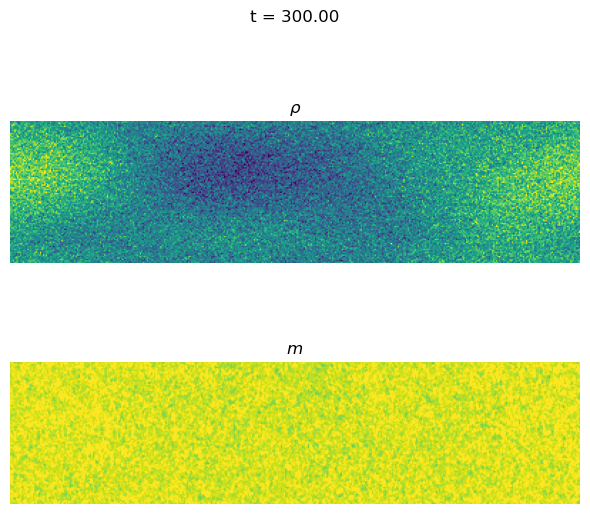

In [13]:
n = -1
# fig, ax = plt.subplots(1,1)
t = obs['t'][n]
y1 = obs['rho'][n]
y2 = obs['m'][n]
fig, ax = plt.subplots(2,1, figsize = (6,6))
vm =1
cmap = 'viridis'
im1 = ax[0].imshow(y1.T, cmap=cmap, animated=True, vmin = -vm, vmax = vm)

im2 = ax[1].imshow(y2.T, cmap=cmap, animated=True, vmin = -vm, vmax = vm)

ax[0].axis('off')  
ax[1].axis('off')  
ax[0].set_title(f"$\\rho$")
ax[1].set_title(f"$m$")
plt.suptitle(f"t = {t:.2f}")
plt.tight_layout()

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Example snapshots (replace these with your actual data)

# Save each frame as an image
frames = []

for t, rho, m in  tqdm(zip(obs['t'], obs['rho'], obs['m'])):

    fig, ax = plt.subplots(2,1, figsize = (6,6))
    im = ax[0].imshow(rho.T, cmap=cmap, animated=True, vmin = -vm, vmax = vm)
    im = ax[1].imshow(m.T, cmap=cmap, animated=True, vmin = -vm, vmax = vm)
    
    ax[0].axis('off')  
    ax[1].axis('off')  
    ax[0].set_title(f"$\\rho$")
    ax[1].set_title(f"$m$")
    plt.suptitle(f"t = {t:.2f}")

    # Save frame to a buffer
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.buffer_rgba(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    frames.append(Image.fromarray(image))

    plt.close(fig)  

# Save all frames as a GIF
frames[0].save(
    "gifs/AIM_example.gif",
    save_all=True,
    append_images=frames[1:],
    duration=100,  
    loop=0, 
)

0it [00:00, ?it/s]

61it [00:01, 33.47it/s]


#### Vmap expample on model A (batching over rngs)

Because of the vectorizaiton function vmap of jax, it is quite easy to run a batch of simulations with different random seeds.

In  this example we use a simple call back function to return some observables, in this case jus the magnetization and its second moment

In [15]:
L = 256
N = 256
Li = (L, L) 
Ni = (N, N) 
model = ModelA(Li, Ni)

par = {'r' : -0.3, 'J' : 1.0, 'Gamma' : 1.0, 'Gamma_t' : 0.05, 'dt' : 0.1} 

def MyCallBack(field, t, par): 
    phi_real   =   RealSpace(field['phi'])
    return {'m'  : phi_real.mean(), 'm2 ' : (phi_real**2).mean()  }

In [16]:
rng_base = jar.PRNGKey(1994)
rng_sim = jar.PRNGKey(1994)
rng_s, rng_init = jar.split(rng_base, 2) 
field = model.Init(rng_init)
rng_s = jar.split(rng_sim, 10) 

from functools import partial 
field_end, obs  = jax.vmap(
    partial(model.simulate, SaveStep=4, callback=MyCallBack) 
    ,  in_axes = ( None, None, 0, None)) (field, par, rng_s, 1500) 

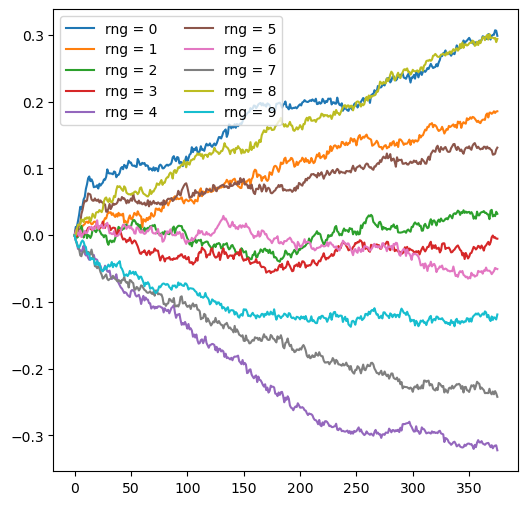

In [17]:
plt.figure(figsize = (6,6))
for n, mi in enumerate(obs['m']): 
    plt.plot(mi, label = f"rng = {n}")
plt.legend(ncol = 2) 

These are simulations starting from the same initial condition evolved using different seeds for the random number generation.

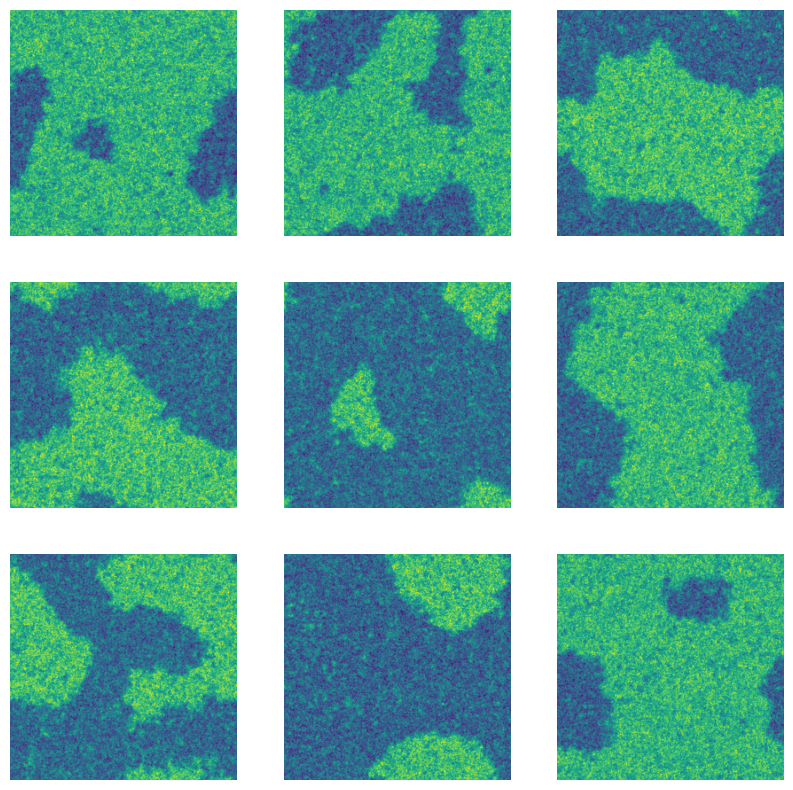

In [18]:
fig, ax = plt.subplots(3,3, figsize = (10,10))
for k in range(9):
    i,j = divmod(k,3) 
    ax[i,j].imshow(field_end['phi'][k])
    ax[i,j].axis('off')


####  Vmap example batching on the initial condition

We show how to apply the vmap funciton to simulate different instances of Model B with different initial condition ( with different total magnetization m)

In [19]:
L = 256
N = 256
Li = (L, L) 
Ni = (N, N) 
model = ModelB(Li, Ni)

par = {'r' : -1.0, 'J' : 2.0, 'Gamma' : 1.0, 'Gamma_t' : 0.01, 'dt' : 0.1} 
rng = jar.PRNGKey(0)  
rng_init, rng_sim = jar.split(rng)
field = model.InitAt(rng_init, 0.0 )   

In [20]:
m0 = jnp.linspace(0,0.2, 4)
fields = jax.vmap(model.InitAt, in_axes=(None,0))(rng_init, m0 )
run = lambda field : model.simulate(field, par, rng_sim, 500, SaveStep = 4, ShowProgress=True)
final_conf, obs = jax.vmap(run)(fields)

100%|██████████| 5001/5001 [00:16<00:00, 299.17it/s]


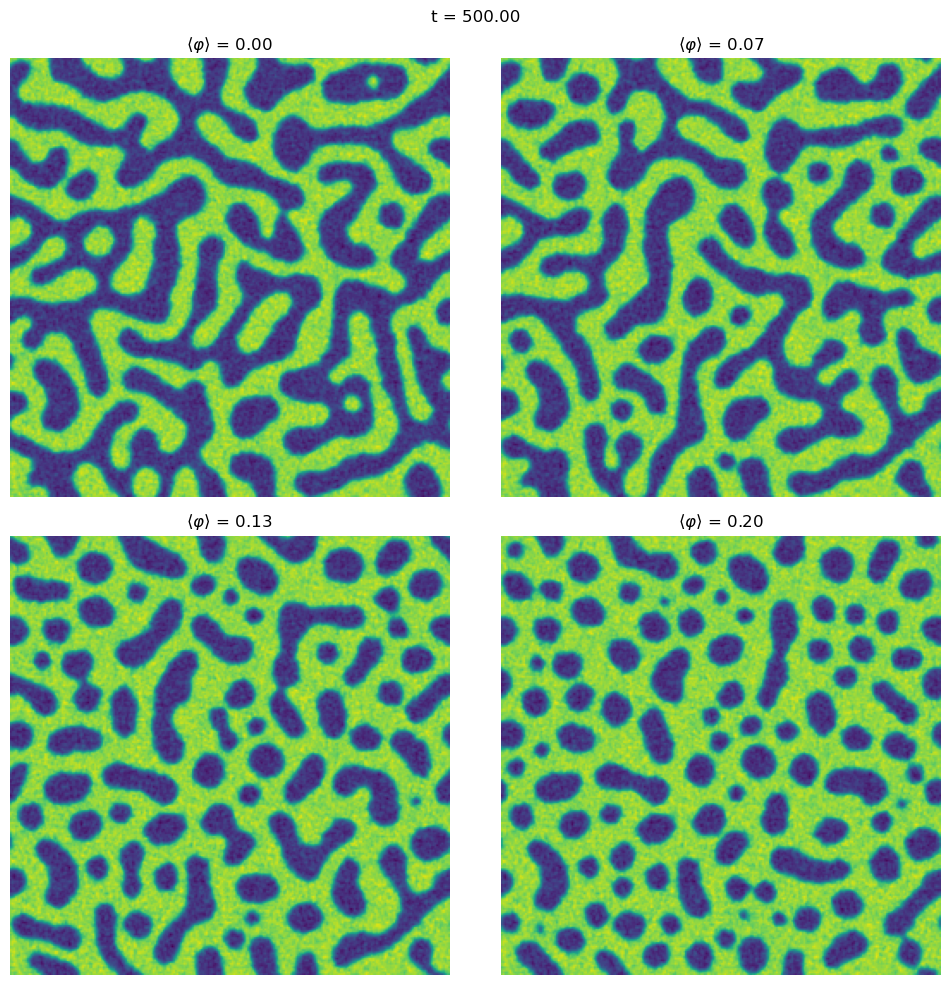

In [21]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
for n in range(4): 
    i, j = divmod(n, 2)
    ax[i,j].imshow(final_conf['phi'][n], vmin = -1, vmax = 1)   
    ax[i,j].axis('off')
    ax[i,j].set_title(f"$\langle \\varphi \\rangle$ = {m0[n]:.2f}")
plt.suptitle(f't = {obs["t"][0][-1]:.2f}')
plt.tight_layout() 

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


frames = []
cmap = 'viridis'
T = len(obs['t'][0])
for ti in tqdm(range(T)): 

    fig, ax = plt.subplots(2,2, figsize = (10, 10))
    for n in range(4): 
        i, j = divmod(n, 2)
        ax[i,j].imshow(obs['phi'][n][ti], cmap=cmap, animated=True, vmin = -1, vmax = 1)
        ax[i,j].axis('off')
        ax[i,j].set_title(f"m = {m0[n]:.2f}")
    t = obs['t'][0][ti]
    plt.suptitle(f"t = {t:.2f}")

    # Save frame to a buffer
    fig.canvas.draw()
    image = np.frombuffer(fig.canvas.buffer_rgba(), dtype='uint8')
    image = image.reshape(fig.canvas.get_width_height()[::-1] + (4,))
    frames.append(Image.fromarray(image))

    plt.close(fig)  # Close the figure to avoid memory issues

# Save all frames as a GIF
frames[0].save(
    "gifs/ModelB_many_Initial_conditions.gif",
    save_all=True,
    append_images=frames[1:],
    duration=100,
    loop=0,
)

100%|██████████| 126/126 [00:11<00:00, 10.81it/s]
